### Import Libraries

In [21]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pyplot
%pip install seaborn
%pip install matplotlib
%matplotlib inline
%pip install xgboost
%pip install statsmodels
%pip install warnings
%pip install openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
sns.set(context='paper', style='darkgrid', 
        rc={'figure.facecolor':'white'}, font_scale=1.2, color_codes=True)
%matplotlib inline



%pip install scikit-learn
%pip install --upgrade scikit-learn


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, precision_recall_curve, classification_report
# from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score

from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.dummy import DummyClassifier
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
        


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Load File

In [22]:
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)
# pd.set_option('max_rows', 200)
pd.set_option('display.max_colwidth', 150)

tc = pd.read_csv('ibm_Telco_customer_churn.xlsx - Telco_Churn.csv') 
tc.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964,-118.273,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059,-118.307,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048,-118.294,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062,-118.316,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039,-118.266,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.700,5036.3,Yes,1,89,5340,Competitor had better devices


#### Delete same column

In [23]:
# drop_cols = ['Churn Label'] #same as "churn value"
# tc.drop(drop_cols, axis=1, inplace=True)  #axis=1 選擇欄非列, inplace=True覆蓋原檔

In [24]:
# convert column names to lower case with underscore
tc.columns = tc.columns.str.lower().str.replace(' ','_')

### Preprocess Data

#### Check missing values

In [25]:
tc.isnull().sum()

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_label             0
churn_value             0
churn_score             0
cltv                    0
churn_reason         5174
dtype: int64

#### Check data type

In [26]:
tc.dtypes

customerid            object
count                  int64
country               object
state                 object
city                  object
zip_code               int64
lat_long              object
latitude             float64
longitude            float64
gender                object
senior_citizen        object
partner               object
dependents            object
tenure_months          int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn_label           object
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason          object
dtype: object

In [27]:
categorical_feature=[feature for feature in tc.columns if tc[feature].dtypes=='object']
print(categorical_feature)

numerical_feature=[feature for feature in tc.columns if tc[feature].dtypes!='object']
print(numerical_feature)

['customerid', 'country', 'state', 'city', 'lat_long', 'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'total_charges', 'churn_label', 'churn_reason']
['count', 'zip_code', 'latitude', 'longitude', 'tenure_months', 'monthly_charges', 'churn_value', 'churn_score', 'cltv']


In [28]:
col_list = ['gender', 'senior_citizen', 'partner', 'dependents', 
            'phone_service', 'multiple_lines', 'internet_service', 
            'online_security', 'online_backup', 'device_protection', 
            'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 
            'paperless_billing', 'payment_method', 'churn_value', 
            'churn_reason', 'country', 'state', 'city', 'zip_code'] #排除tenure monthlych totalch churscore cltv

for col in col_list:
     print(f'\nValue Counts | column = {col}')
     print(tc[col].value_counts(normalize=True, dropna=False)) #normalize=True加入占比, dropna=False包含缺失值


Value Counts | column = gender
gender
Male     0.505
Female   0.495
Name: proportion, dtype: float64

Value Counts | column = senior_citizen
senior_citizen
No    0.838
Yes   0.162
Name: proportion, dtype: float64

Value Counts | column = partner
partner
No    0.517
Yes   0.483
Name: proportion, dtype: float64

Value Counts | column = dependents
dependents
No    0.769
Yes   0.231
Name: proportion, dtype: float64

Value Counts | column = phone_service
phone_service
Yes   0.903
No    0.097
Name: proportion, dtype: float64

Value Counts | column = multiple_lines
multiple_lines
No                 0.481
Yes                0.422
No phone service   0.097
Name: proportion, dtype: float64

Value Counts | column = internet_service
internet_service
Fiber optic   0.440
DSL           0.344
No            0.217
Name: proportion, dtype: float64

Value Counts | column = online_security
online_security
No                    0.497
Yes                   0.287
No internet service   0.217
Name: proportion, 

#### EDA

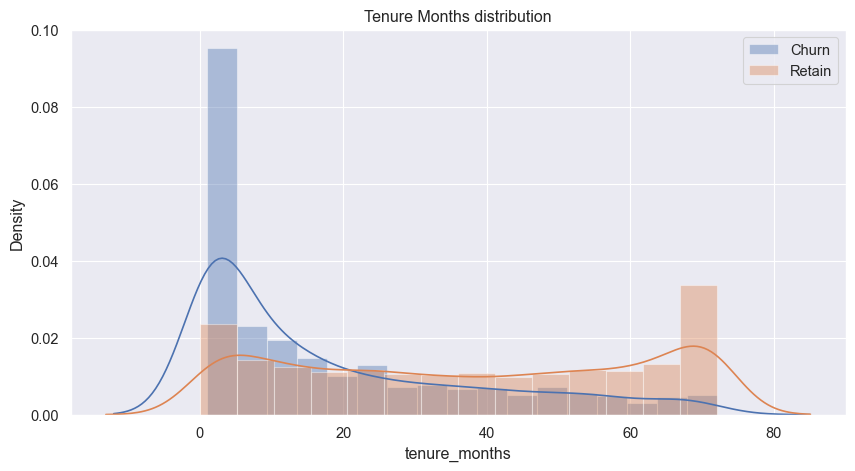

In [29]:
mp.figure(figsize=(10,5))
mp.title('Tenure Months distribution')
sns.distplot(tc[tc['churn_label']=='Yes']['tenure_months'],label='Churn')
sns.distplot(tc[tc['churn_label']=='No']['tenure_months'],label='Retain')

mp.legend(loc='upper right')
mp.show()

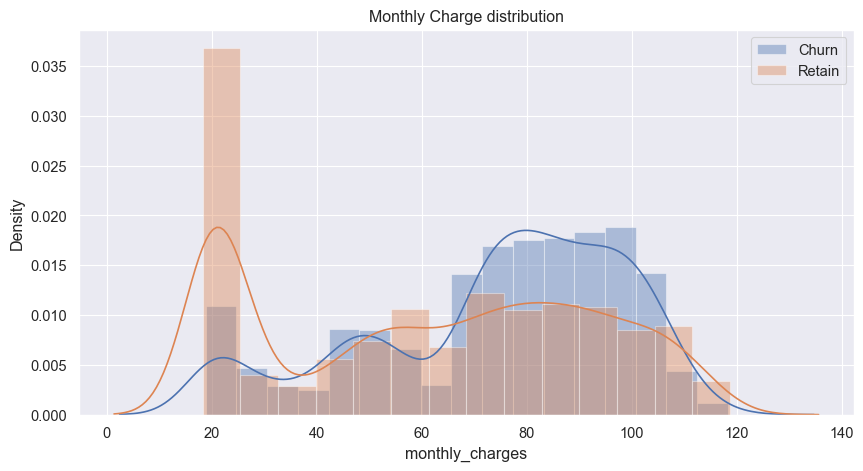

In [30]:
mp.figure(figsize=(10,5))
mp.title('Monthly Charge distribution')
sns.distplot(tc[tc['churn_label']=='Yes']['monthly_charges'],label='Churn')
sns.distplot(tc[tc['churn_label']=='No']['monthly_charges'],label='Retain')

mp.legend(loc='upper right')
mp.show()

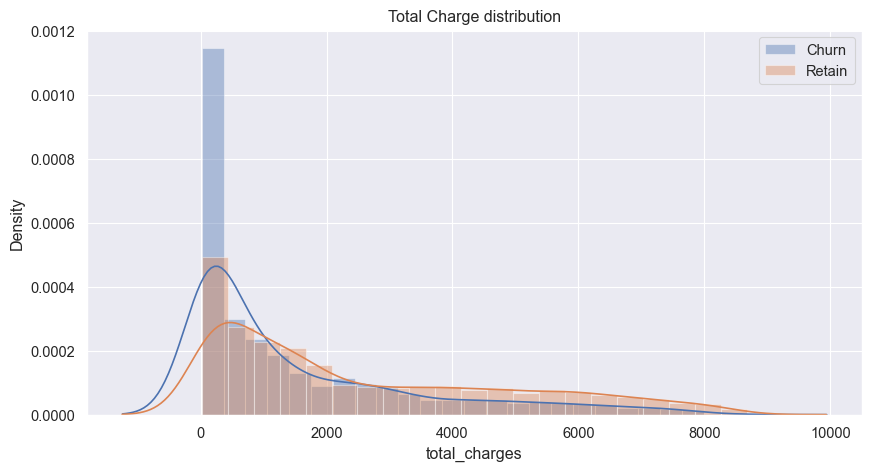

In [32]:
tc['total_charges'] = tc['total_charges'].str.strip()
tc['total_charges'] = pd.to_numeric(tc['total_charges'])

mp.figure(figsize=(10,5))
mp.title('Total Charge distribution')
sns.distplot(tc[tc['churn_label']=='Yes']['total_charges'],label='Churn')
sns.distplot(tc[tc['churn_label']=='No']['total_charges'],label='Retain')

mp.legend(loc='upper right')
mp.show()

#### Label encoding (Binary yes/no to 0/1 or ordinal low/medium/high to 1/2/3)

In [33]:
# replace yes-no variables with 0/1 for modeling
def replace_yes_no(X_df):
    bool_list = ['senior_citizen', 'partner', 'dependents', 'phone_service', 
                 'multiple_lines', 'internet_service', 'online_security', 
                 'online_backup', 'device_protection', 'tech_support', 
                 'streaming_tv', 'streaming_movies', 'paperless_billing']
    for col in bool_list:
        X_df.replace({col : { 'Yes' : 1, 'No' : 0, 'No phone service' : 0, 
                                 'No internet service' : 0}}, inplace=True)
    return X_df

# tc_tr =replace_yes_no(tc)

#### Group_map churnreason

In [34]:
# create churn reason group to simplify
def group_churn_reason(X_df):
    
    reason_map = {'Attitude of support person' : 'Cust Service',
                  'Attitude of service provider' : 'Cust Service', 
                  'Service dissatisfaction' : 'Cust Service', 
                  'Lack of self-service on Website' : 'Cust Service', 
                  'Poor expertise of phone support'  : 'Cust Service', 
                  'Poor expertise of online support' : 'Cust Service', 
                  'Competitor offered higher download speeds' : 'Product', 
                  'Competitor offered more data' : 'Product', 
                  'Competitor had better devices' : 'Product', 
                  'Network reliability' : 'Product', 
                  'Product dissatisfaction' : 'Product', 
                  'Limited range of services' : 'Product', 
                  'Competitor made better offer' : 'Pricing', 
                  'Price too high' : 'Pricing', 
                  'Extra data charges' : 'Pricing', 
                  'Long distance charges' : 'Pricing', 
                  'Lack of affordable download/upload speed' : 'Pricing', 
                  'Moved' : 'Moved', 
                  'Deceased' : 'Moved',
                  'Don\'t know' : 'Unknown'
                 }

    # X_df['churn_rsn_grp'] = X_df.churn_reason.map(reason_map)
    X_df['churn_rsn_grp'] = X_df['churn_reason'].map(reason_map)
    return X_df

# tc_tr_g=group_churn_reason(tc_tr)
# tc_tr_g.head()

#### One-hot encoding (Dummy encoding)

In [35]:
def ohe_categories(X_df):
    categoricals = ['gender', 'internet_service', 'contract', 'payment_method', 
                    'churn_rsn_grp']    # create list of multi-class variables for one-hot encoding

    # create one-hot encoded dummy variables for categoricals
    X_df_ohe = pd.get_dummies(X_df[categoricals], drop_first=False, dtype=int) #original columns convert to dummies
    
    X_df_ohe.rename(
        columns={'gender_Male' : 'gender_male',
                 'gender_Female' : 'gender_female', 
                 'internet_service_0' : 'internet_svc_none' , 
                 'internet_service_DSL' : 'internet_svc_dsl', 
                 'internet_service_Fiber optic' : 'internet_svc_fiber', 
                 'contract_Month-to-month' : 'contract_mtm', 
                 'contract_One year' : 'contract_1yr', 
                 'contract_Two year' : 'contract_2yr', 
                 'payment_method_Bank transfer (automatic)' : 'pmt_meth_bank_trx_auto', 
                 'payment_method_Credit card (automatic)' : 'pmt_meth_cc_auto', 
                 'payment_method_Electronic check' : 'pmt_meth_echeck', 
                 'payment_method_Mailed check' : 'pmt_meth_mail_check', 
                 'churn_rsn_grp_Cust Service' : 'churn_rsn_grp_cust_svc',                             
                 'churn_rsn_grp_Moved' : 'churn_rsn_grp_moved', 
                 'churn_rsn_grp_Pricing' : 'churn_rsn_grp_pricing', 
                 'churn_rsn_grp_Product' : 'churn_rsn_grp_product', 
                 'churn_rsn_grp_Unknown' : 'churn_rsn_grp_unknown'
                }, inplace = True)
    
    # # concatenate OHE with original df #original df + dummy(OHE) df
    X_df2 = pd.concat([X_df, X_df_ohe], axis=1)
    # drop original category columns
    X_df2.drop(categoricals, axis=1, inplace=True)
    
    # return x_df_ohe
    return X_df2

# tc_tr_ohe =ohe_categories(tc_tr_g)
# tc_tr_ohe.head()

#### Impute total_charges估算遺失值
##### 作法二>也可以把型態都變成數值，不補值

In [36]:
# take a look at total_charges
def impute_total_charges(X_df):
    """Imputes column total_charges in cases where column is non-numeric or 
    blank, using tenure_months and monthly_charge to estimate.

    Parameters:
    X_df (pd.DataFrame)): train or test slice contains predictors

    Returns:
    X_df (pd.DataFrame)): same dataframe with imputed values
    """
    
    # impute total_charges as monthly x num months
    i=0
    for label, row in X_df.iterrows():
        if not isinstance(row['total_charges'], (int, float)): #if not int or float
            i+=1
            X_df.loc[label, 'total_charges'] = (
                row['tenure_months']*row['monthly_charges']) #impute by multiplying tenure*monthlycharg

    X_df['total_charges'] = X_df['total_charges'].astype(float)

    print(f'Imputed {i} rows of non-numeric total_charges')
    return X_df

# tc_tr_im=impute_total_charges(tc_tr_ohe)
# tc_tr_im.head()

#### Group_map products

In [37]:
# create new columns combining customer services to show bundles p1~p8
def map_products(X_df):
   
    prod_cols = ['p1_phone_only', 'p2_phone_multi', 'p3_dsl_only', 'p4_dsl_plus', 
                 'p5_dsl_bund_core', 'p6_dsl_bund_plus', 'p7_fib_bund_core', 
                 'p8_fib_bund_plus']
    for newcol in prod_cols:
        X_df[newcol]= 0
        
        X_df.loc[(X_df['phone_service']==1) & (X_df['multiple_lines']==0) & 
         (X_df['internet_svc_dsl']==0) & (X_df['internet_svc_fiber']==0) & 
         (X_df['tech_support']==0) & (X_df['online_backup']==0) & 
         (X_df['online_security']==0) & (X_df['device_protection']==0), 
         'p1_phone_only'] = 1

        X_df.loc[(X_df['phone_service']==1) & (X_df['multiple_lines']==1) & 
         (X_df['internet_svc_dsl']==0) & (X_df['internet_svc_fiber']==0) & 
         (X_df['tech_support']==0) & (X_df['online_backup']==0) &
         (X_df['online_security']==0) & (X_df['device_protection']==0), 
         'p2_phone_multi'] = 1

        X_df.loc[(X_df['phone_service']==0) & (X_df['multiple_lines']==0) & 
         (X_df['internet_svc_dsl']==1) & (X_df['internet_svc_fiber']==0) & 
         (X_df['tech_support']==0) & (X_df['online_backup']==0) &
         (X_df['online_security']==0) & (X_df['device_protection']==0), 
         'p3_dsl_only'] = 1

        X_df.loc[(X_df['phone_service']==0) & (X_df['multiple_lines']==0) & 
         (X_df['internet_svc_dsl']==1) & (X_df['internet_svc_fiber']==0) & 
         ((X_df['tech_support']==1) | (X_df['online_backup']==1) |
         (X_df['online_security']==1) | (X_df['device_protection']==1)), 
         'p4_dsl_plus'] = 1

        X_df.loc[(X_df['phone_service']==1) & (X_df['multiple_lines']==0) & 
         (X_df['internet_svc_dsl']==1) & (X_df['internet_svc_fiber']==0) & 
         (X_df['tech_support']==0) & (X_df['online_backup']==0) &
         (X_df['online_security']==0) & (X_df['device_protection']==0), 
         'p5_dsl_bund_core'] = 1

        X_df.loc[(X_df['phone_service']==1) & (X_df['internet_svc_dsl']==1) 
         & (X_df['internet_svc_fiber']==0) & ((X_df['multiple_lines']==1) | 
         (X_df['tech_support']==1) | (X_df['online_backup']==1) |
         (X_df['online_security']==1) | (X_df['device_protection']==1)), 
         'p6_dsl_bund_plus'] = 1

        X_df.loc[(X_df['phone_service']==1) & (X_df['multiple_lines']==0) & 
         (X_df['internet_svc_dsl']==0) & (X_df['internet_svc_fiber']==1) & 
         (X_df['tech_support']==0) & (X_df['online_backup']==0) &
         (X_df['online_security']==0) & (X_df['device_protection']==0), 
         'p7_fib_bund_core'] = 1

        X_df.loc[(X_df['phone_service']==1) & (X_df['internet_svc_dsl']==0) & 
         (X_df['internet_svc_fiber']==1) & ((X_df['multiple_lines']==1) | 
         (X_df['tech_support']==1) | (X_df['online_backup']==1) |
         (X_df['online_security']==1) | (X_df['device_protection']==1)), 
         'p8_fib_bund_plus'] = 1

    return X_df
# tc_tr_p=map_products(tc_tr_im)
# tc_tr_p.head()

#### Create_features

In [38]:
# function creates a few calculated metrics as features (not all made final model)
def create_features(X_df):
    """Creates calculated fields services_cnt and monthly_charge_life_avg as 
    new features on dataframe.

    Parameters:
    X_df (pd.DataFrame)): train or test slice contains predictors

    Returns:
    X_df (pd.DataFrame)): same dataframe with new columns
    """

    # create column for lifetime average monthly charge
    X_df['charge_trend_index'] = np.where(X_df.tenure_months!=0, 
                                               round(X_df.monthly_charges /(X_df.total_charges / X_df.tenure_months), 2), 
                                               X_df.monthly_charges) #np.where(condition, True=x, False=y)
    # create feature counting number of stream services
    X_df['streams'] = X_df[['streaming_movies', 'streaming_tv']].sum(axis=1) 
    
    # create feature 0/1 whether payment method is an automated method or not
    X_df['pmt_meth_auto'] = X_df[['pmt_meth_cc_auto', 'pmt_meth_bank_trx_auto']].sum(axis=1)

    # create feature counting number of add-on services
    X_df['svc_add_ons'] = X_df[['online_security', 'online_backup', 'device_protection', 'tech_support', 'multiple_lines']].sum(axis=1)
    

    # create charges index ratio of actual charges to standard charges
    X_df['charge_cust_index'] = round(X_df['monthly_charges'] / 
                                      (X_df['phone_service']*18.26 + 
                                       X_df['internet_svc_dsl']*27.88 + 
                                       X_df['internet_svc_fiber']*58.79 + 
                                       X_df['multiple_lines']*7.51 + 
                                       X_df['online_security']*3.34 + 
                                       X_df['online_backup']*5.75 + 
                                       X_df['device_protection']*9.57 +
                                       X_df['tech_support']*5.86),2
                                    )
    # bin tenure into 1st year versus other longer loyalty
    X_df['tenure_1yr'] = X_df.tenure_months.apply(lambda x: 1 if x<12 else 0) #lambda x, y: x + y #lambda 參數:函式
    X_df['tenure_2-4yr'] = X_df.tenure_months.apply(lambda x: 1 if x>12 and x<48 else 0)
    X_df['tenure_4+yr'] = X_df.tenure_months.apply(lambda x: 1 if x>48 else 0)

    return X_df
    
# tc_tr_f=create_features(tc_tr_p)
# tc_tr_f.head()
                                        

#### Data prep pipeline

In [39]:
# function holds data preparation pipeline for X predictors dataframe
def data_prep_pipe(X_df):
    """Executes data preparation pipeline of steps to clean and transform
    an X features dataframe.

    Parameters:
    X_df (pd.DataFrame)): train or test slice contains predictors

    Returns:
    X_df_tr (pd.DataFrame)): train or test dataframe, transformed
    """
    
    # instantiate custom transformer functions
    get_replace_yes_no = FunctionTransformer(replace_yes_no, validate=False)
    get_group_churn_reason = FunctionTransformer(group_churn_reason, validate=False)
    get_impute_total_charges = FunctionTransformer(impute_total_charges, validate=False)
    get_map_products = FunctionTransformer(map_products, validate=False)
    get_ohe_categories = FunctionTransformer(ohe_categories, validate=False)
    get_create_features = FunctionTransformer(create_features, validate=False)

    # instantiate data prep pipeline object and steps
    prep_pipe = Pipeline(memory=None, 
                         steps=[('replace_yes_no', get_replace_yes_no),
                                ('group_churn_reason', get_group_churn_reason),
                                ('impute_total_charges', get_impute_total_charges),
                                ('ohe_categories', get_ohe_categories),
                                ('map_products', get_map_products),                                
                                ('create_features', get_create_features)
                                ])
    
    # apply data prep pipeline to df and store/return new df
    X_df_tr = prep_pipe.fit_transform(X_df)
    return X_df_tr

tc_tr= data_prep_pipe(tc)
tc_tr.head()

Imputed 0 rows of non-numeric total_charges


,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason,gender_female,gender_male,internet_svc_none,internet_svc_dsl,internet_svc_fiber,contract_mtm,contract_1yr,contract_2yr,pmt_meth_bank_trx_auto,pmt_meth_cc_auto,pmt_meth_echeck,pmt_meth_mail_check,churn_rsn_grp_cust_svc,churn_rsn_grp_moved,churn_rsn_grp_pricing,churn_rsn_grp_product,churn_rsn_grp_unknown,p1_phone_only,p2_phone_multi,p3_dsl_only,p4_dsl_plus,p5_dsl_bund_core,p6_dsl_bund_plus,p7_fib_bund_core,p8_fib_bund_plus,charge_trend_index,streams,pmt_meth_auto,svc_add_ons,charge_cust_index,tenure_1yr,tenure_2-4yr,tenure_4+yr
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964,-118.273,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,108.150,Yes,1,86,3239,Competitor made better offer,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1.000,0,0,2,0.980,1,0,0
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059,-118.307,0,0,1,2,1,0,0,0,0,0,0,0,1,70.700,151.650,Yes,1,67,2701,Moved,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.930,0,0,0,0.920,1,0,0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048,-118.294,0,0,1,8,1,1,0,0,1,0,1,1,1,99.650,820.500,Yes,1,86,5372,Moved,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.970,2,0,2,1.060,1,0,0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062,-118.316,0,1,1,28,1,1,0,0,1,1,1,1,1,104.800,"3,046.050",Yes,1,84,5003,Moved,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.960,2,0,3,1.050,0,1,0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039,-118.266,0,0,1,49,1,1,0,1,1,0,1,1,1,103.700,"5,036.300",Yes,1,89,5340,Competitor had better devices,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.010,2,1,3,1.040,0,0,1


#### Describe

In [40]:
# basic describe stats
tc_tr.describe()

,count,zip_code,latitude,longitude,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn_value,churn_score,cltv,gender_female,gender_male,internet_svc_none,internet_svc_dsl,internet_svc_fiber,contract_mtm,contract_1yr,contract_2yr,pmt_meth_bank_trx_auto,pmt_meth_cc_auto,pmt_meth_echeck,pmt_meth_mail_check,churn_rsn_grp_cust_svc,churn_rsn_grp_moved,churn_rsn_grp_pricing,churn_rsn_grp_product,churn_rsn_grp_unknown,p1_phone_only,p2_phone_multi,p3_dsl_only,p4_dsl_plus,p5_dsl_bund_core,p6_dsl_bund_plus,p7_fib_bund_core,p8_fib_bund_plus,charge_trend_index,streams,pmt_meth_auto,svc_add_ons,charge_cust_index,tenure_1yr,tenure_2-4yr,tenure_4+yr
count,"7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,032.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000","7,043.000"
mean,1.000,"93,521.965",36.282,-119.799,0.162,0.483,0.231,32.371,0.903,0.422,0.287,0.345,0.344,0.290,0.384,0.388,0.592,64.762,"2,283.300",0.265,58.699,"4,400.296",0.495,0.505,0.217,0.344,0.440,0.550,0.209,0.241,0.219,0.216,0.336,0.229,0.077,0.008,0.054,0.104,0.022,0.168,0.049,0.019,0.078,0.032,0.215,0.062,0.378,1.065,0.772,0.435,1.687,1.040,0.294,0.363,0.318
std,0.000,"1,865.795",2.456,2.158,0.369,0.500,0.422,24.559,0.296,0.494,0.452,0.475,0.475,0.454,0.486,0.487,0.491,30.090,"2,266.771",0.442,21.525,"1,183.057",0.500,0.500,0.412,0.475,0.496,0.498,0.407,0.428,0.414,0.412,0.472,0.420,0.267,0.091,0.227,0.305,0.146,0.374,0.215,0.135,0.269,0.177,0.411,0.240,0.485,1.832,0.853,0.496,1.476,0.116,0.456,0.481,0.466
min,1.000,"90,001.000",32.556,-124.301,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.250,18.800,0.000,5.000,"2,003.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.640,0.000,0.000,0.000,0.770,0.000,0.000,0.000
25%,1.000,"92,102.000",34.031,-121.815,0.000,0.000,0.000,9.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,35.500,401.450,0.000,40.000,"3,469.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.980,0.000,0.000,0.000,0.950,0.000,0.000,0.000
50%,1.000,"93,552.000",36.392,-119.731,0.000,0.000,0.000,29.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,70.350,"1,397.475",0.000,61.000,"4,527.000",0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.040,0.000,0.000,0.000
75%,1.000,"95,351.000",38.225,-118.043,0.000,1.000,0.000,55.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,89.850,"3,794.738",1.000,75.000,"5,380.500",1.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.020,2.000,1.000,3.000,1.110,1.000,1.000,1.000
max,1.000,"96,161.000",41.962,-114.193,1.000,1.000,1.000,72.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,118.750,"8,684.800",1.000,100.000,"6,500.000",1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,80.850,2.000,1.000,5.000,1.660,1.000,1.000,1.000


### Correlation
#### Limit to churn target and drop non-predictive fields
#### EDA (most related to churn target)

#### Show heatmap for correlation matrix among potential predictors

#### Check for collinearity among potential predictors by pairs

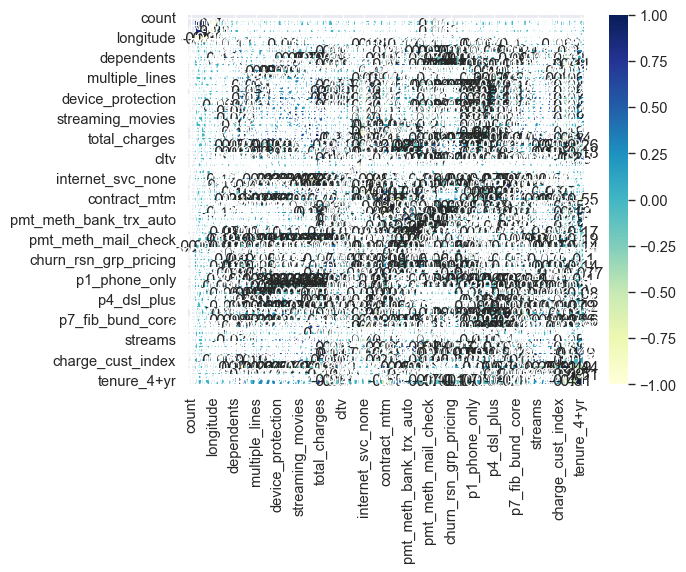

In [45]:
#兩變數間相關性
# numeric_cols = tc_tr.select_dtypes(include=['float', 'int'])
# corplot=sns.heatmap(numeric_cols.corr(),cmap="YlGnBu",annot=True)
# corplot=sns.heatmap(tc_tr.corr(),cmap="YlGnBu",annot=True)

### Train-Test Split

In [42]:
# Create X predictors and y target variable
y = tc['churn_value']
X = tc.drop(columns=['churn_value'], axis=1)

# Split into training and test sets
SEED = 19
jobs = -1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=SEED)